<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 07: Genetic algorithms**

## **Outline**

1. [Ejercicio 1. G.A. cost function](#eje1)
2. [Ejercicio 2. G.A. crossover function](#eje2)





In [5]:
#@title 1. MONTAR EL DRIVE **student** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/UIS/IA/ai-uis-student/talleres20202')
print(os.getcwd())
!chmod 777 convert_ipynb.sh run utils/*

Mounted at /content/drive
/content/drive/My Drive/UIS/IA/ai-uis-student/talleres20202


---
#### - Usted debe ejecutar **TODAS** las celdas de tipo **CODE**. De lo contrario, sus respuestas no serán procesadas correctamente.

---

# **Algoritmos Geneticos: Comunicación en una mesa redonda**


Un grupo de 300 personas de diferentes países se sienta en una mesa circular con 300 sillas. Cada persona sabe hablar dos idiomas (no necesariamente los mismos para todos). Los idiomas se codificarán de la siguiente manera:

*   0: Español
*   1: Inglés
*   2: Alemán
*   3: Francés
*   4: Portugués
*   5: Mandarín
*   6: Coreano
*   7: Noruego
*   8: Italiano
*   9: Persa
*   10: Árabe

Para este taller una mesa se codifica como un arreglo de 300 posiciones, y en cada posición (silla de la mesa) existe una lista de los dos posibles idiomas. Observe la siguiente ilustración.

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20202/misc/mesaredonda01.png" />

Vamos a generar una **_buena_** solución para que se encuentre una disposición de las personas en la mesa de manera que cada persona pueda comunicarse con sus dos vecinos en la mesa.

- Tenga en cuenta que cada persona debe hablar dos idiomas **diferentes**. Es decir, si $(x_i, x_j)$ es la dupla de idiomas hablados por la persona, se tiene que cumplir que: $\enspace$ $x_i \neq x_j$

Para los siguientes puntos, la mesa redonda se simulará con el siguiente arreglo, donde cada solución es una permutación de los indices de la mesa. 

[ 56 251  14 124 256  49 153 145 105 133  78 207 106 103 173  34  40 174
  39 230 204 276 169 107 219 279  50  83 296 194 266 259  48  99 160 285
 255 170 280  75 208  84 269 189 104 188  20 274 100 244 260  42 119 268
 183 243 289 267  63   6 227 226  11 222  97 184 159 192 237 126 150 292
 122 118 146 162  27 158 135 147 161 247 178  91  80  55  85 298 283  25
 125 232 134 102   5  21  58 238 143  45  74 257 206 190 108 253 168  24
  94 223 130 164 287 197 113 144 163 193 294 233  69 172 156 181 179   4
 110 141   8 114 165 154 196  62 200  86 281 220  59  43  77 273 215  95
  66   9 175 148 167 216  57 131 286   7 136  37 140 157  70 228  87 121
 213 248  98 137  17 277  71 262 290 245 132 229 234  93 265 101  82  65
 241  92 271  64 299 111  10 250 297 212 115  35  51   3  76  54  13  32
 249 275   2  16  61 116 127   1 282  19  68  79 182 284 231  29  96  22
 142 210 187  88 225 209 186 202 177  67  15 270  60  44 291 166  28  41
 185 151 176 288 295 218 138  38 195 171 242 293 26

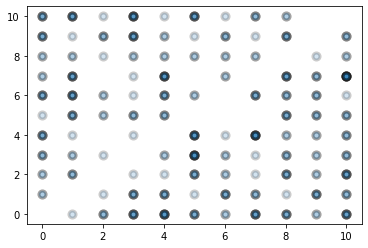

In [6]:
#@title **code** codificación de la mesa y dos posibles soluciones
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Generamos 300 personas con sus dos idiomas hablados
mesa_redonda = np.array([[7,4],[4,9],[0,4],[2,9],[3,0],[5,9],[9,3],[3,1],[7,0],[5,0],[5,10],[6,1],[1,7],[6,1],[0,9],[1,6],[4,7],[0,10],[1,7],[5,3],[8,2],[7,4],[10,1],[4,7],[2,6],[3,10],[5,6],[2,6],[5,2],[2,0],[9,4],[7,1],[1,8],[8,7],[5,3],[8,2],[3,9],[4,1],[5,6],[10,7],[4,6],[0,5],[4,3],[10,8],[5,10],[3,6],[10,4],[8,2],[6,7],[9,1],[4,0],[6,8],[8,6],[2,9],[10,1],[10,5],[5,8],[2,3],[8,9],[4,8],[8,5],[8,9],[7,6],[10,0],[2,1],[7,4],[10,7],[7,4],[5,4],[4,8],[8,0],[6,3],[0,4],[2,5],[9,4],[10,9],[0,6],[4,7],[10,7],[10,5],[9,6],[1,5],[3,1],[7,0],[10,2],[5,0],[4,7],[2,8],[0,3],[6,0],[9,7],[10,3],[10,7],[9,6],[3,10],[1,5],[2,5],[4,6],[6,2],[1,6],[9,0],[10,2],[4,0],[8,0],[6,9],[10,8],[1,0],[7,1],[0,4],[2,0],[5,4],[4,1],[7,2],[8,7],[4,6],[10,2],[3,10],[7,0],[2,10],[8,5],[0,9],[4,3],[3,9],[9,5],[5,0],[3,8],[4,7],[1,6],[0,9],[1,3],[4,5],[8,9],[8,10],[10,4],[8,4],[9,3],[6,3],[8,10],[9,8],[3,0],[10,0],[0,10],[3,5],[10,3],[8,3],[5,3],[1,10],[4,0],[4,9],[5,3],[5,4],[3,0],[10,0],[4,5],[1,6],[6,4],[6,2],[0,3],[0,10],[0,7],[6,9],[9,5],[1,2],[7,6],[0,6],[7,6],[4,2],[3,7],[5,3],[4,7],[10,9],[3,10],[10,7],[7,8],[9,5],[1,2],[8,1],[5,10],[8,6],[0,4],[7,3],[6,9],[7,10],[9,2],[9,7],[8,5],[3,1],[9,7],[1,3],[10,2],[8,0],[3,0],[5,1],[3,5],[6,1],[6,1],[9,6],[7,1],[3,10],[8,2],[3,9],[5,2],[0,1],[0,9],[3,1],[5,4],[1,10],[5,3],[1,10],[1,5],[10,7],[10,7],[9,2],[8,7],[7,9],[6,7],[10,6],[0,1],[5,8],[7,8],[7,10],[8,9],[3,10],[5,3],[8,5],[3,9],[7,6],[1,6],[8,7],[5,4],[2,9],[7,10],[1,10],[0,8],[8,7],[10,0],[5,10],[3,0],[5,10],[10,5],[10,2],[8,0],[4,6],[10,3],[8,3],[7,4],[1,2],[9,1],[7,0],[1,7],[6,0],[10,7],[0,3],[6,8],[8,6],[1,10],[8,4],[5,2],[3,9],[0,6],[10,7],[0,2],[5,2],[0,6],[10,9],[1,7],[0,10],[5,0],[1,4],[10,4],[4,1],[3,2],[4,0],[9,0],[7,4],[4,0],[1,9],[4,1],[9,1],[1,8],[3,4],[5,4],[3,8],[4,0],[1,5],[3,5],[0,8],[10,1],[4,10],[1,7],[10,0],[2,0],[7,4],[0,7],[4,5],[9,1],[6,10],[8,3],[0,2],[7,0]])
n_personas = len(mesa_redonda)

plt.scatter(mesa_redonda[:,0], mesa_redonda[:,1], s=50, alpha=0.2, edgecolors="black", linewidths=3)

solucion1 = np.random.permutation(n_personas)
solucion2 = np.random.permutation(n_personas)

print(solucion1)
print(solucion2)

# **Inicializar población**  <a name="eje1"></a>

Podemos usar la misma función de inicialización vista en clase, teniendo en cuenta que la codificación de las soluciones se simplifica a mutaciones. Entonces usaremos la siguiente función


In [47]:
#@title **code** generación de posibles formas de sentarse
def TSP_initialize_population1(n_individuals, n_personas):
    r = []
    for i in range(n_individuals):
        r.append(np.random.permutation(n_personas))
    return np.array(r)

# **Ejercicio 1. G.A. cost function**  <a name="eje1"></a>

Complete la función de costo ````TSP_cost1```` para ponderar cada solución teniendo en cuenta el número de vecinos que pueden hablarse, de la siguiente manera:

- Si no es posible hablar el mismo idioma que ambos vecinos, la función de costo debe incrementar 100 unidades.
- De lo contrario, la función de costo debe incrementar solamente 1 unidad.
- Tenga en cuenta los índices que corresponden a la primera posición (índice 0) y a la última posición (índice 299) son considerados **VECINOS**.


**Recomendación:** para simplificar el problema, valide que CUALQUIERA de los dos idiomas hablados por la persona SIGUIENTE, sea el mismo que CUALQUIERA de los dos idiomas que habla la persona actual.



In [8]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def TSP_cost1(personas, solution):
    costo = 0
    sol_personas = personas[solution]
    if sol_personas[0][0] in sol_personas[299] or sol_personas[0][1] in sol_personas[299]:
      costo += 1
    for i in range(sol_personas.shape[0]-1):
      if sol_personas[i][0] in sol_personas[i+1] or sol_personas[i][1] in sol_personas[i+1]:
        costo += 1
      else:
        costo +=100
    return costo



import urllib.parse, inspect
src1 = urllib.parse.quote_plus(inspect.getsource(TSP_cost1))

In [9]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_1 $src1

evaluation result CORRECT


# **Ejercicio 2. G.A. crossover function**  <a name="eje2"></a>

Ahora vamos a generar una función de crossover que obtenga **cuatro hijos** por cada pareja de soluciones que se ingresan, utilizando la configuración descrita en la figura: 


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/talleres20202/misc/mesaredonda02.png" />

In [80]:
#@title **2172969**
#@markdown No modifique las dos últimas lineas

def TSP_cross_over_1(solution1, solution2):
    l = len(solution1)
    fp = int(l*0.2)
    stard1 = solution1[:fp]
    end1 = solution1[-fp:]
    stard2 = solution2[:fp]
    end2 = solution2[-fp:]
    r = np.zeros((4,l))
    r[0,:fp] = stard1
    r[1,:fp] = stard2
    r[2,:fp] = end1
    r[3,:fp] = end2
    c = fp
    for i in range(l):
      if not solution2[i] in stard1:
        r[0][c]=solution2[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution1[i] in stard2:
        r[1][c]=solution1[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution2[i] in end1:
        r[2][c]=solution2[i]
        c += 1
    c = fp
    for i in range(l):
      if not solution1[i] in end2:
        r[3][c]=solution1[i]
        c += 1
        

    return r[0], r[1], r[2], r[3]


#Colaboratory
import urllib.parse, inspect
src2 = urllib.parse.quote_plus(inspect.getsource(TSP_cross_over_1))

In [81]:
#@title **Evalue su respuesta.**
!./run CHECK_SOLUTION PS7_2 $src2

(array([ 2., 11.,  0.,  8., 16., 18., 13.,  7., 15.,  3., 14.,  1.,  5.,
        4., 10.,  6., 12., 17.,  9., 19.]), array([16., 18., 13.,  7.,  2., 11.,  0.,  8.,  9.,  6., 19., 14., 10.,
        4.,  5., 15.,  1.,  3., 17., 12.]), array([13.,  3., 17., 12., 16., 18.,  7., 15., 14.,  1.,  5.,  4., 10.,
        6.,  2., 11.,  9., 19.,  8.,  0.]), array([ 9., 19.,  8.,  0.,  2., 11.,  7., 16., 18.,  6., 14., 10.,  4.,
        5., 15.,  1., 13.,  3., 17., 12.]))
(array([ 2., 11.,  0.,  8., 16., 18., 13.,  7., 15.,  3., 14.,  1.,  5.,
        4., 10.,  6., 12., 17.,  9., 19.]), array([16., 18., 13.,  7.,  2., 11.,  0.,  8.,  9.,  6., 19., 14., 10.,
        4.,  5., 15.,  1.,  3., 17., 12.]), array([13.,  3., 17., 12., 16., 18.,  7., 15., 14.,  1.,  5.,  4., 10.,
        6.,  2., 11.,  9., 19.,  8.,  0.]), array([ 9., 19.,  8.,  0.,  2., 11.,  7., 16., 18.,  6., 14., 10.,  4.,
        5., 15.,  1., 13.,  3., 17., 12.]))
evaluation result CORRECT


In [82]:
#@title **Verifique su solución**

sol1 = np.random.permutation(20)
sol2 = np.random.permutation(20)
print(sol1)
print(sol2)


hijos = TSP_cross_over_1(sol1, sol2)
print(hijos[0])
print(hijos[1])
print(hijos[2])
print(hijos[3])

[ 5 13 14 18  0 10  2 16  1  9  7 17  6  8  3 11 19 15 12  4]
[ 1 15 10 11 14  9  8 13 16  7  3  6 17  2  4  5 18 19 12  0]
[ 5. 13. 14. 18.  1. 15. 10. 11.  9.  8. 16.  7.  3.  6. 17.  2.  4. 19.
 12.  0.]
[ 1. 15. 10. 11.  5. 13. 14. 18.  0.  2. 16.  9.  7. 17.  6.  8.  3. 19.
 12.  4.]
[19. 15. 12.  4.  1. 10. 11. 14.  9.  8. 13. 16.  7.  3.  6. 17.  2.  5.
 18.  0.]
[18. 19. 12.  0.  5. 13. 14. 10.  2. 16.  1.  9.  7. 17.  6.  8.  3. 11.
 15.  4.]


Teniendo en cuenta la codificación del problema, podemos usar las funciones de mutación que vimos en clase.

In [83]:
#@title **code** mutation
def TSP_mutate1(solution, mutation_prob):
    mutated_solution = np.copy(solution)
    for i in range(len(solution)):
        if np.random.random()<mutation_prob:
            j = i+1 if i!=len(solution)-1 else 0
            tmp = mutated_solution[i]
            mutated_solution[i] = mutated_solution[j]
            mutated_solution[j] = tmp
    return mutated_solution

Finalmente, observe el funcionamiento del algoritmo genético:

In [ ]:
#@title **verifique su respuesta**
import numpy as np

def TSP_plot_GA_result(best, bests, means, stds):
    fig = plt.figure(figsize=(12,4))
    fig.add_subplot(121)
    plot_evolution(bests, means, stds)


%run ga4.py

r = run_ga(pop_size=10, 
               init_population_function = lambda x: TSP_initialize_population1(x, n_personas), 
               mutation_function        = TSP_mutate1, 
               crossover_function       = TSP_cross_over_1,
               cost_function            = lambda x: TSP_cost1(mesa_redonda, x), 
               crossover_prob           = 0.001,
               mutation_prob            = 0.001, 
               n_iters                  = 1500)

best, best_costs, means, stds = r
TSP_plot_GA_result(best, best_costs, means, stds)
print("Orden de los indices", best)
print("Secuencia en la que se deben sentar las personas \n", mesa_redonda[best].tolist())

<br><br><br><br>

# **Pasos Finales.**



#### 1. Reemplace la variable con su código de estudiante

In [ ]:
#@title **1. Complete la siguiente información:**
taller_name = "Taller_std_07_20202" #@param {type:"string"}
codigo_name = "tl7_2172969" #@param {type:"string"}


import urllib.parse, inspect
taller = urllib.parse.quote_plus(taller_name)
codigo = urllib.parse.quote_plus(codigo_name)

print(taller, codigo)

In [ ]:
#@title **2. Guarde los cambios del taller**
%%javascript
require(["base/js/namespace"],function(Jupyter) {
    Jupyter.notebook.save_checkpoint();
});

In [ ]:
#@title **3. Ejecute la siguiente celda y envíe el archivo**
!./convert_ipynb.sh $codigo $taller

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;"/>